100%|██████████| 300/300 [01:24<00:00,  3.54it/s]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide


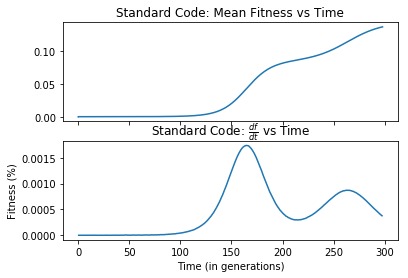

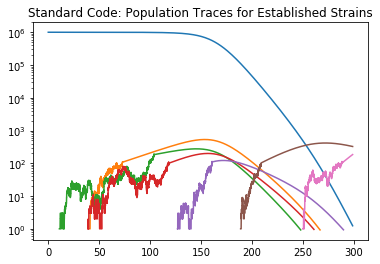

In [1]:
import numpy as np
import pandas as pd
from codonTable import codonTable
from codonUtils import utils
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import networkx as nx
from thunderflask import thunderflask
from bacteria import strain
from tqdm import tqdm

# run several iterations
# populate sim
LUCA = strain(N_pop=1e6, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 1

# run simulation
sim.simulate(300, dt, T_curr, mut_param)
t = np.array(sim.f_trace['timepoints'])
f = np.array(sim.f_trace['fitnesses'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Standard Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Standard Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    if i % 10 == 0:
        t = bact.timepoints
        pop = bact.poptrace
        plt.semilogy(t, pop)
plt.title('Standard Code: Population Traces for Established Strains')
plt.show()


In [2]:
table = codonTable()
table.dictToTable()

U        C        A        G
U U  UUU : F  UCU : S  UAU : Y  UGU : C
  C  UUC : F  UCC : S  UAC : Y  UGC : C
  A  UUA : L  UCA : S  UAA : *  UGA : *
  G  UUG : L  UCG : S  UAG : *  UGG : W
C U  CUU : L  CCU : P  CAU : H  CGU : R
  C  CUC : L  CCC : P  CAC : H  CGC : R
  A  CUA : L  CCA : P  CAA : Q  CGA : R
  G  CUG : L  CCG : P  CAG : Q  CGG : R
A U  AUU : I  ACU : T  AAU : N  AGU : S
  C  AUC : I  ACC : T  AAC : N  AGC : S
  A  AUA : I  ACA : T  AAA : K  AGA : R
  G  AUG : M  ACG : T  AAG : K  AGG : R
G U  GUU : V  GCU : A  GAU : D  GGU : G
  C  GUC : V  GCC : A  GAC : D  GGC : G
  A  GUA : V  GCA : A  GAA : E  GGA : G
  G  GUG : V  GCG : A  GAG : E  GGG : G

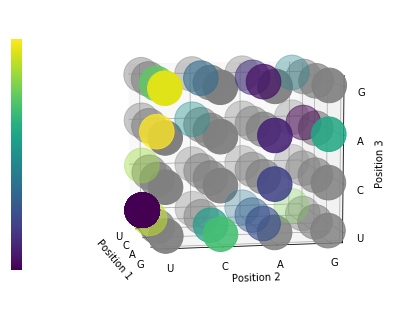

100%|██████████| 300/300 [02:00<00:00,  2.49it/s]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in true_divide


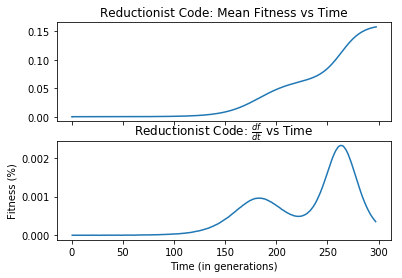

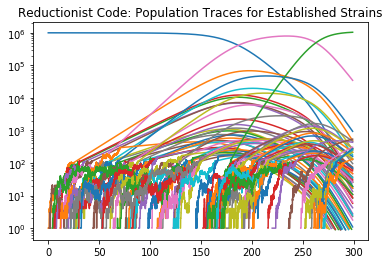

In [10]:
import numpy as np
import pandas as pd
from codonTable import codonTable
from codonUtils import utils
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from thunderflask import thunderflask
from bacteria import strain
from tqdm import tqdm
table = codonTable()
newTable = table.codonDict
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(table=newTable)
#table.dictToGraph()
#utils.getAAcounts(newTable)
#utils.getCodonConnectivity(newTable)
#utils.getResiConnectivity(newTable)
table.plot3d()
# populate sim with a reductionist organism
LUCA = strain(N_pop=1e6, table=newTable, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 1

# run simulation
sim.simulate(300, dt, T_curr, mut_param)
t = np.array(sim.f_trace['timepoints'])
f = np.array(sim.f_trace['fitnesses'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Reductionist Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Reductionist Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    # if i % 10 == 0:
    t = bact.timepoints
    pop = bact.poptrace
    plt.semilogy(t, pop)
plt.title('Reductionist Code: Population Traces for Established Strains')
plt.show()

100%|██████████| 300/300 [07:12<00:00,  1.44s/it]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


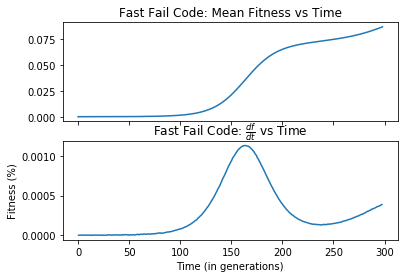

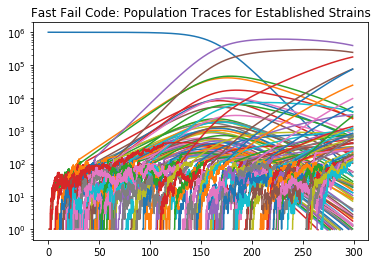

In [5]:
from ffgen import ffgen
# populate sim with a fast fail organism
table = ffgen.triplet()
LUCA = strain(N_pop=1e6, table=table, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 1

# run simulation
sim.simulate(300, dt, T_curr, mut_param)
t = np.array(sim.f_trace['timepoints'])
f = np.array(sim.f_trace['fitnesses'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Fast Fail Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Fast Fail Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    # if i % 10 == 0:
    t = bact.timepoints
    pop = bact.poptrace
    plt.semilogy(t, pop)
plt.title('Fast Fail Code: Population Traces for Established Strains')
plt.show()


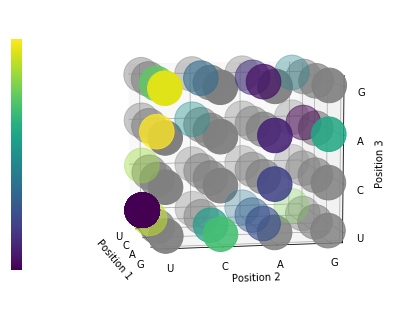

100%|██████████| 300/300 [02:53<00:00,  1.73it/s]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in true_divide


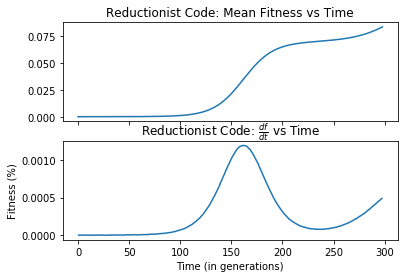

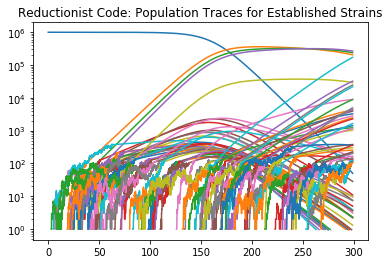

In [12]:
import numpy as np
import pandas as pd
from codonTable import codonTable
from codonUtils import utils
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from thunderflask import thunderflask
from bacteria import strain
from tqdm import tqdm
table = codonTable()
newTable = table.codonDict
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(table=newTable)
#table.dictToGraph()
#utils.getAAcounts(newTable)
#utils.getCodonConnectivity(newTable)
#utils.getResiConnectivity(newTable)
table.plot3d()
# populate sim with a reductionist organism
LUCA = strain(N_pop=1e6, table=tableObj, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 1

# run simulation
sim.simulate(300, dt, T_curr, mut_param)
t = np.array(sim.f_trace['timepoints'])
f = np.array(sim.f_trace['fitnesses'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Reductionist Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Reductionist Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    # if i % 10 == 0:
    t = bact.timepoints
    pop = bact.poptrace
    plt.semilogy(t, pop)
plt.title('Reductionist Code: Population Traces for Established Strains')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from codonTable import codonTable
from codonUtils import utils
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from thunderflask import thunderflask
from bacteria import strain
from tqdm import tqdm
table = codonTable()
newTable = table.codonDict
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(table=newTable)
#table.dictToGraph()
#utils.getAAcounts(newTable)
#utils.getCodonConnectivity(newTable)
#utils.getResiConnectivity(newTable)
table.plot3d()
# populate sim with a reductionist organism
LUCA = strain(N_pop=1e6, table=tableObj, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 1

# run simulation
sim.simulate(300, dt, T_curr, mut_param)
t = np.array(sim.f_trace['timepoints'])
f = np.array(sim.f_trace['fitnesses'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Reductionist Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Reductionist Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    # if i % 10 == 0:
    t = bact.timepoints
    pop = bact.poptrace
    plt.semilogy(t, pop)
plt.title('Reductionist Code: Population Traces for Established Strains')
plt.show()